#Mock Exam 2023 - Clustering

Find the clusters for the included dataset.



1.   Load data, separate in X all columns but the last one, in y the last column, then produce a pairplot and comment what you see (2 pt)

2. Find the best clustering scheme for X with a method of your choice, plot the silhouette index for an appropriate range of parameters and show the chosen hyperparameter(s) (4 pt)

3. Fit the clustering scheme, store the cluster labels in y_km and output the silhouette score (2 pt)

4. Use the labels in the last column of the output file as the "gold standard" for the clustering and quantify the matching among the two clustering schemes with sklearn.metrics.cluster.pair_confusion_matrix (2 pt)

5. Consider possible pre-processing actions, repeat the fitting and evaluate as before the result of the new fitting (5 pt)

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

random_state = 42
url = '/content/exam_data.csv'

##1. Load data, separate in X all columns but the last one, in y the last column, then produce a pairplot of X and comment what you see (2 pt)

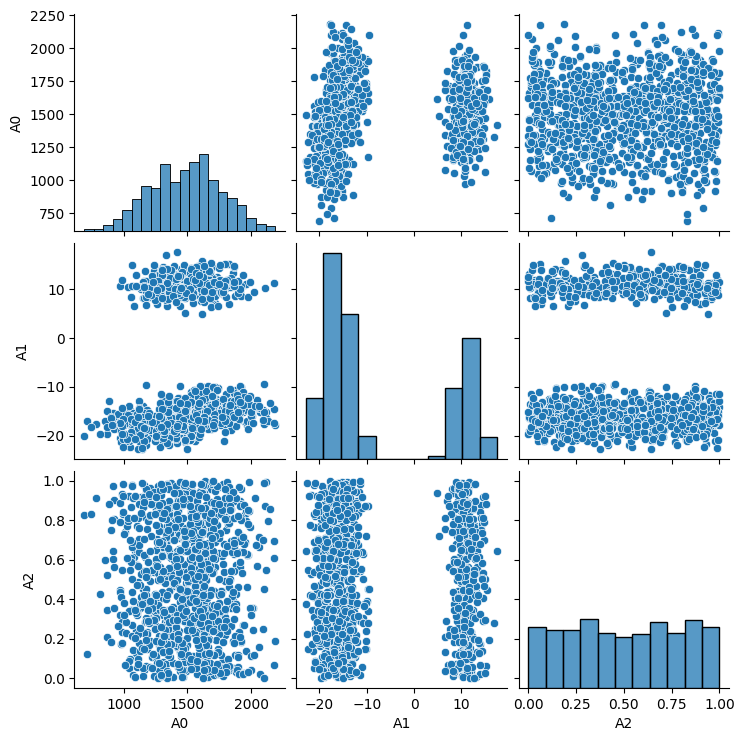

In [116]:
df = pd.read_csv(url)
X = df.iloc[:,:-1]
y = df.iloc[:,3]

sns.pairplot(X)

Only certain plots like (A0,A1) and (A1,A2) seem to show interesting configurations with 2 clusters clearly visible.

##2. Find the best clustering scheme for X with a method of your choice, plot the silhouette index for an appropriate range of parameters and show the chosen hyperparameter(s) (4 pt)

I will use K-Means

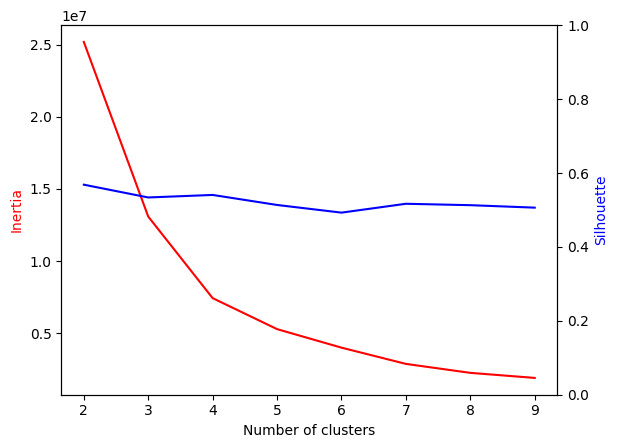

In [117]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
size_deviation = []
distortion = []

k_ranges = list(np.arange(2,10))

for k in k_ranges:
  km = KMeans(k, random_state=random_state)
  y_km = km.fit_predict(X)

  silhouette = silhouette_score(X, y_km, random_state=random_state)
  deviation = np.sqrt(np.unique(y_km, return_counts=True)[1].var())/k

  silhouette_scores.append(silhouette)
  size_deviation.append(deviation)
  distortion.append(km.inertia_)

fig, ax1 = plt.subplots()
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia', color='red')
ax1.plot(k_ranges, distortion, color='red')

ax2 = ax1.twinx()
ax2.set_ylabel('Silhouette', color='blue')
ax2.set_ylim(0,1)
ax2.plot(k_ranges, silhouette_scores, color='blue')

Silhouette score in not great, we have a maximum on k=2. There is also a local maximum on k=4, with a good Distortion value.

Visually the best number of cluster is 2 without a doubt, but looking at the combined Distortion and Silhouette plot the best number of clusters seems to be 4.

##3. Fit the clustering scheme, store the cluster labels in y_km and output the silhouette score (2 pt)

In [118]:
k = 4
km = KMeans(k, random_state=random_state)
y_km = km.fit_predict(X)

km_silhouette_score = silhouette_score(X, y_km, random_state=random_state)
print('Silhouette score on with 4 clusters is {:.3f}'.format(km_silhouette_score))

Silhouette score on with 4 clusters is 0.541


##4. Use the labels in the last column of the output file as the "gold standard" for the clustering and quantify the matching among the two clustering schemes with sklearn.metrics.cluster.pair_confusion_matrix (2 pt)

In [119]:
from sklearn.metrics import pair_confusion_matrix
pcm = pair_confusion_matrix(y, y_km)
print(pcm/pcm.sum())
#print((pcm / pcm.sum()).diagonal().sum()*100)
print("The percentage of match between the two clustering schemes is {:6.2f}%".format((pcm / pcm.sum()).diagonal().sum()*100))

[[0.52187187 0.14546146]
 [0.20851652 0.12415015]]
The percentage of match between the two clustering schemes is  64.60%


##5. Consider possible pre-processing actions, repeat the fitting and evaluate as before the result of the new fitting (5 pt)

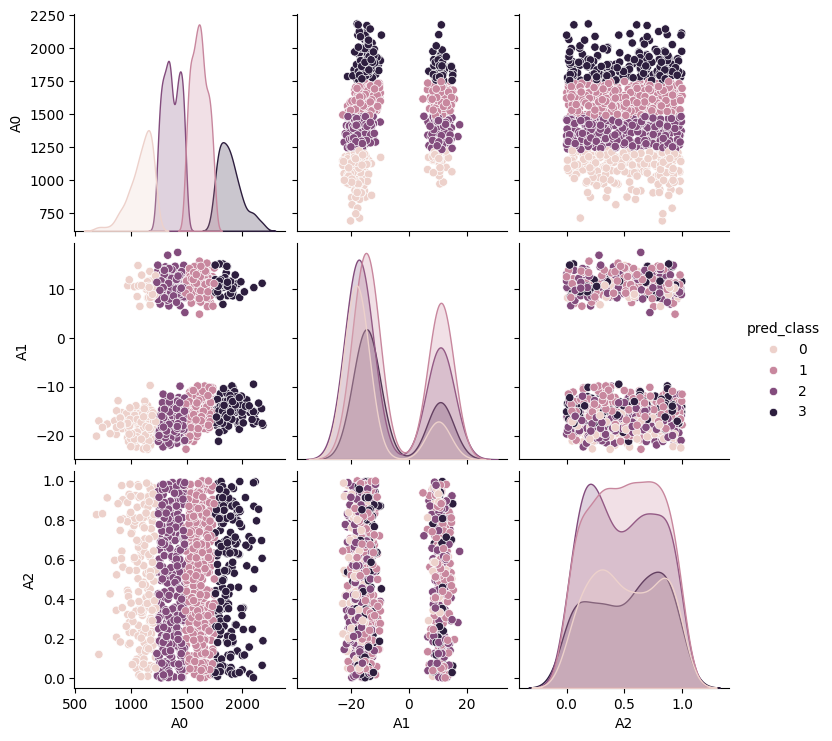

In [120]:
X_pred = X.copy()
X_pred["pred_class"] = y_km
sns.pairplot(X_pred, hue = 'pred_class')